In [14]:
# 
using UnfoldSim
using Unfold
using CairoMakie
using UnfoldMakie
using DataFrames
using Random


In [10]:
design =
    SingleSubjectDesign(;
        conditions = Dict(
            :condition => ["car", "face"],
            :continuous => range(0, 5, length = 10),
        ),
    ) |> x -> RepeatDesign(x, 100);

In [18]:
p1 = LinearModelComponent(; basis = p100(), formula = @formula(0 ~ 1), β = [5]);

In [19]:
n1 = LinearModelComponent(;
    basis = n170(),
    formula = @formula(0 ~ 1 + condition),
    β = [5, 3],
);

In [20]:
p3 = LinearModelComponent(;
    basis = p300(),
    formula = @formula(0 ~ 1 + continuous + continuous^2),
    β = [5, 1, 0.2],
);

In [21]:
components = [p1, n1, p3]
data, evts = simulate(
    MersenneTwister(1),
    design,
    components,
    UniformOnset(; width = 0, offset = 1000),
    PinkNoise(),
);

In [22]:
m = fit(
    UnfoldModel,
    Dict(
        Any => (
            @formula(0 ~ 1 + condition + spl(continuous, 4)),
            firbasis(τ = [-0.1, 1], sfreq = 100, name = "basis"),
        ),
    ),
    evts,
    data,
);

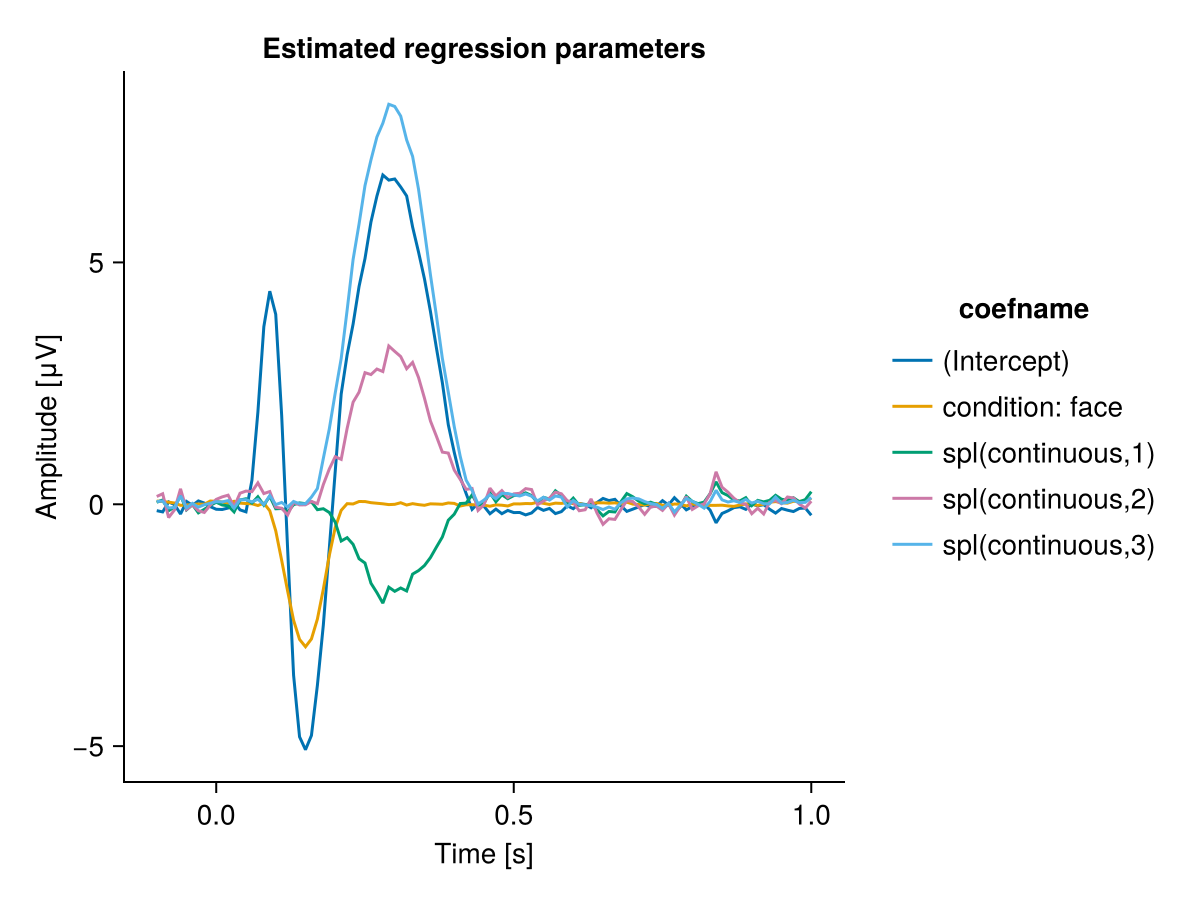

In [23]:
plot_erp(
    coeftable(m);
    axis = (
        title = "Estimated regression parameters",
        xlabel = "Time [s]",
        ylabel = "Amplitude [μV]",
    ),
)

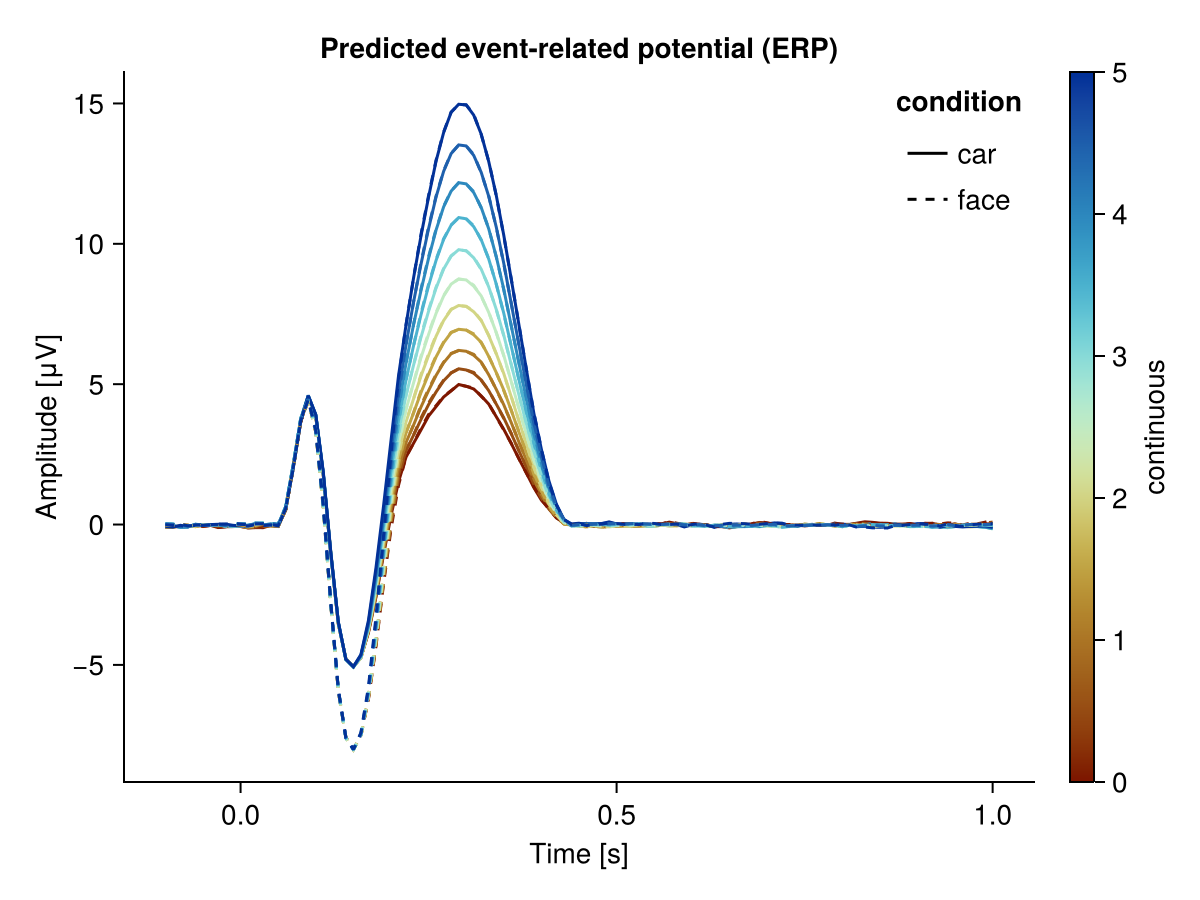

In [24]:
f = plot_erp(
    effects(Dict(:condition => ["car", "face"], :continuous => 0:0.5:5), m);
    axis = (
        title = "Predicted event-related potential (ERP)",
        xlabel = "Time [s]",
        ylabel = "Amplitude [μV]",
    ),
    mapping = (:color => :continuous, linestyle = :condition, group = :continuous),
    legend = (; valign = :top, halign = :right, tellwidth = false),
    categorical_color = false,
);

# Workaround to separate legend and colorbar (will be fixed in a future UnfoldMakie version)
legend = f.content[2]
f[:, 1] = legend
current_figure()